# Индивидуальное задание 9
## Задача 1

In [40]:
import pandas as pd
import numpy as np

df_train_url = 'https://courses.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+BIGDATAINTROML+fall_2022_ITMO+type@asset+block/candy-data.csv'
df_test_url = 'https://courses.openedu.ru/assets/courseware/v1/d53b0f8b959d03cc84a992f6070cabc6/asset-v1:ITMOUniversity+BIGDATAINTROML+fall_2022_ITMO+type@asset+block/candy-test.csv'

df_train = pd.read_csv(df_train_url)
df_test = pd.read_csv(df_test_url)

In [41]:
df_train.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'Y'],
      dtype='object')

In [42]:
df_test.shape

(15, 13)

In [43]:
df_train = df_train[(df_train.competitorname != 'Kit Kat') & (df_train.competitorname != 'Milk Duds') & (df_train.competitorname != 'Sour Patch Tricksters')]
X_train = df_train.drop(columns=['competitorname', 'winpercent', 'Y'])
y_train = df_train.Y

In [44]:
df_test.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.7670,0
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.3250,0
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.1160,0
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.7550,1
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.5654,1


In [45]:
df_test.iloc[df_test[(df_test.competitorname == 'Tootsie Roll Juniors') | (df_test.competitorname == 'Trolli Sour Bites')].index]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
5,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313,0.511,0
8,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313,0.255,0


In [46]:
X_test = df_test.drop(columns=['competitorname', 'Y'])
y_test = df_test.Y

X_test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,0,1,1,0,0,0,1,0,1,0.647364,0.7670
1,1,0,0,0,1,0,1,0,0,0.418000,0.3250
2,0,1,0,0,0,0,0,0,0,0.162000,0.1160
3,0,1,0,0,0,0,0,0,1,0.604000,0.7550
4,1,0,0,0,0,0,0,0,0,0.876560,0.5654


In [47]:
from sklearn.linear_model import LogisticRegression


log_reg_model = LogisticRegression(random_state = 2019, solver = 'lbfgs').fit(X_train, y_train)

In [48]:
log_reg_model.predict(X_test)[df_test[(df_test.competitorname == 'Tootsie Roll Juniors') | (df_test.competitorname == 'Trolli Sour Bites')].index]

array([1, 0])

In [53]:
np.round(log_reg_model.predict_proba(X_test)[df_test[(df_test.competitorname == 'Tootsie Roll Juniors') | (df_test.competitorname == 'Trolli Sour Bites')].index], 3)

array([[0.332, 0.668],
       [0.689, 0.311]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, log_reg_model.predict(X_test))

0.6666666666666666

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_reg_model.predict(X_test))

array([[7, 3],
       [2, 3]])

In [32]:
from sklearn.metrics import recall_score
recall_score(y_test, log_reg_model.predict(X_test))

0.6

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, log_reg_model.predict(X_test))

0.5

In [52]:
from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1]), 3)

0.88

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


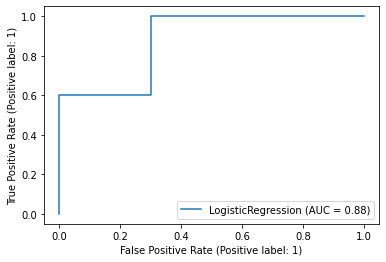

In [37]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg_model, X_test, y_test)

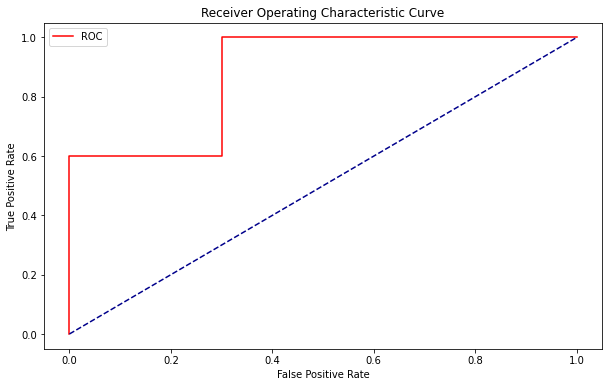

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


#Keeping only positive class
probs = log_reg_model.predict_proba(X_test)[:, 1]

#Calculating the FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plotting the figure
plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [38]:
thresholds

array([1.76346167, 0.76346167, 0.73684732, 0.51199588, 0.36406768,
       0.13067213])